In [157]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Generating the percentage change of exchange rates: RD and RB

In [2]:
np.random.seed(100)

df = pd.DataFrame(data=np.random.normal(size=10000))
df = df.rename(columns={0: 'X'})
df['Y'] = np.random.normal(size=10000)

df['z'] = 0.675*df['X'] + math.sqrt(1-0.675**2)*df['Y']
df['RD'] = 0+9*df['X']
df['RB'] = 0+11*df['z']

df.drop('X',axis=1,inplace=True)
df.drop('Y',axis=1,inplace=True)
df.drop('z',axis=1,inplace=True)

## Calculating the Exchange rates: D and B

In [4]:
df['D'] = 0.6531*(1+(df['RD']/100))
df['B'] = 1.234*(1+(df['RB']/100))
df

,RD,RB,D,B
0,-15.747889,-13.702047,0.550251,1.064917
1,3.084124,7.765856,0.673242,1.329831
2,10.377322,-0.036012,0.720874,1.233556
3,-2.271924,3.414355,0.638262,1.276133
4,8.831887,12.474742,0.710781,1.387938
...,...,...,...,...
9995,14.862923,10.273591,0.750170,1.360776
9996,0.929519,-3.469702,0.659171,1.191184
9997,-4.041010,-15.090745,0.626708,1.047780
9998,6.594543,9.709754,0.696169,1.353818


In [62]:
df.to_csv('C:\\Users\\sabbe\\Desktop\\University of Pittsburgh\\Fall 2021\\IE 2086 Decision Models\\ps1\\Project\\df.csv')

<Figure size 5000x2000 with 0 Axes>

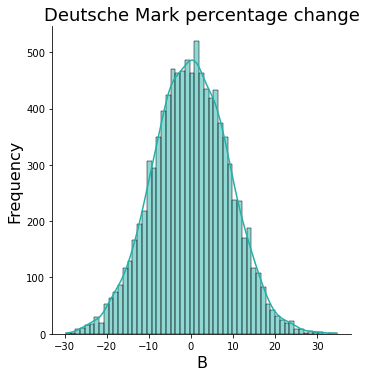

In [56]:
plt.figure(figsize=(10,4),dpi=500)
#sns.color_palette("light:#5A9",as_cmap=True)
ax=sns.displot(data=df,x='RD',kde=True,color='lightseagreen') # Kernel Density Estimation


plt.title('Deutsche Mark percentage change', fontsize=18)
plt.xlabel('B', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

ax.savefig('RD.png', dpi=500)

<Figure size 5000x2000 with 0 Axes>

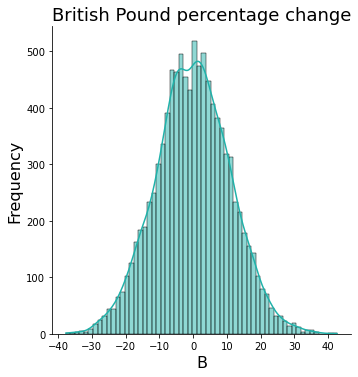

In [57]:
plt.figure(figsize=(10,4),dpi=500)
#sns.color_palette("light:#5A9",as_cmap=True)
ax=sns.displot(data=df,x='RB',kde=True,color='lightseagreen') # Kernel Density Estimation


plt.title('British Pound percentage change', fontsize=18)
plt.xlabel('B', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

ax.savefig('RB.png', dpi=500)

<Figure size 1000x1000 with 0 Axes>

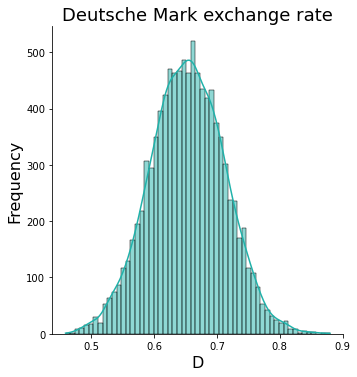

In [59]:

#sns.color_palette("light:#5A9",as_cmap=True)
ax=sns.displot(data=df,x='D',kde=True,color='lightseagreen') # Kernel Density Estimation


plt.title('Deutsche Mark exchange rate', fontsize=18)
plt.xlabel('D', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

ax.savefig('D.png', dpi=500)

<Figure size 5000x2000 with 0 Axes>

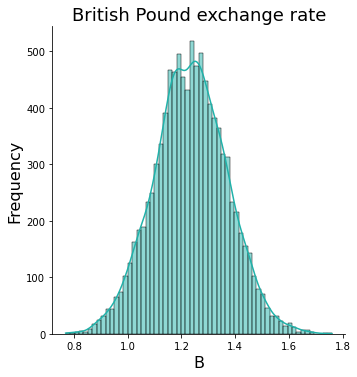

In [55]:
plt.figure(figsize=(10,4),dpi=500)
#sns.color_palette("light:#5A9",as_cmap=True)
ax=sns.displot(data=df,x='B',kde=True,color='lightseagreen') # Kernel Density Estimation


plt.title('British Pound exchange rate', fontsize=18)
plt.xlabel('B', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

ax.savefig('B.png', dpi=500)

## Given put options data

In [60]:
k_1 = [0.66, 0.65, 0.64, 0.63, 0.62, 0.61, 0.60, 0.59, 0.55] ## Strikes on German mark
c_1 = [0.085855,0.032191, 0.020795, 0.017001, 0.013711, 0.010851, 0.008388, 0.006291, 0.001401] ## Cost on German mark

k_2 = [1.30, 1.25, 1.20, 1.15, 1.10, 1.05, 1.00, 0.95, 0.90] ## ## Strikes on British mark
c_2 = [0.137213, 0.082645, 0.045060, 0.028338, 0.016146, 0.007860, 0.003277, 0.001134, 0.000245] ## Cost on British mark

EG = 643 ## revenue generated next year in Germany in million
EB = 272 ## revenue generated next year in Britain in million

PG = 500 ## put options on DM in million
PB = 500 ## put options on Pound in million

## Calculating the Hedged USD Revenue as Final_Hedg

In [64]:
#Hedg_G = []
#Hedg_B = []
Hedg = []
Final_Hedg = []

for a in range(0,len(k_1)):
    for b in range(0,len(k_2)):
        for i in range(0,len(df)):
    
            Hedg_g = EG*df['D'].iloc[i] + PG*(max(k_1[a]-df['D'].iloc[i],0)-c_1[a])
            #Hedge_G.append(Hedg_g)
    
            Hedg_b = EB*df['B'].iloc[i] + PB*(max(k_2[b]-df['B'].iloc[i],0)-c_2[b])
            #Hedge_B.append(Hedg_b)
            
            Hedg_ = Hedg_g + Hedg_b
            Hedg.append(Hedg_)
            
        Final_Hedg.append(Hedg)
        Hedg=[]
    
Final_Hedg=np.array(Final_Hedg)
Final_Hedg=np.transpose(Final_Hedg)
Final_Hedg=pd.DataFrame(Final_Hedg)

In [63]:
Final_Hedg.to_csv('C:\\Users\\sabbe\\Desktop\\University of Pittsburgh\\Fall 2021\\IE 2086 Decision Models\\ps1\\Project\\Final_Hedg.csv')

## Renaming the columns of Final_Hedg in the (k_1,k_2) format

In [65]:
i=0
for a in range(0,len(k_1)):
    for b in range(0,len(k_2)):
        Final_Hedg = Final_Hedg.rename(columns={i: f'{k_1[a],k_2[b]}'})
        i=i+1
        
#Final_Hedg.to_csv('C:\\Users\\sabbe\\Desktop\\University of Pittsburgh\\Fall 2021\\IE 2086 Decision Models\\ps1\\Final_Hedg.csv')

In [67]:
Final_Hedg
#Final_Hedg.to_csv('C:\\Users\\sabbe\\Desktop\\University of Pittsburgh\\Fall 2021\\IE 2086 Decision Models\\ps1\\Project\\Final_Hedg.csv')

In [112]:
Final_Hedg_mean = Final_Hedg.agg(['mean']).transpose()
Final_Hedg_mean['(k_1,k_2)'] = Final_Hedg_mean.index
Final_Hedg_mean = Final_Hedg_mean.sort_values('mean',ascending=True)
Final_Hedg_mean

,mean,"(k_1,k_2)"
"(0.66, 1.3)",704.325911,"(0.66, 1.3)"
"(0.66, 1.25)",716.093972,"(0.66, 1.25)"
"(0.66, 1.2)",723.021196,"(0.66, 1.2)"
"(0.66, 1.15)",723.060223,"(0.66, 1.15)"
"(0.66, 1.1)",723.996954,"(0.66, 1.1)"
...,...,...
"(0.59, 0.95)",754.492433,"(0.59, 0.95)"
"(0.59, 0.9)",754.647841,"(0.59, 0.9)"
"(0.55, 1.0)",754.915639,"(0.55, 1.0)"
"(0.55, 0.95)",755.268340,"(0.55, 0.95)"


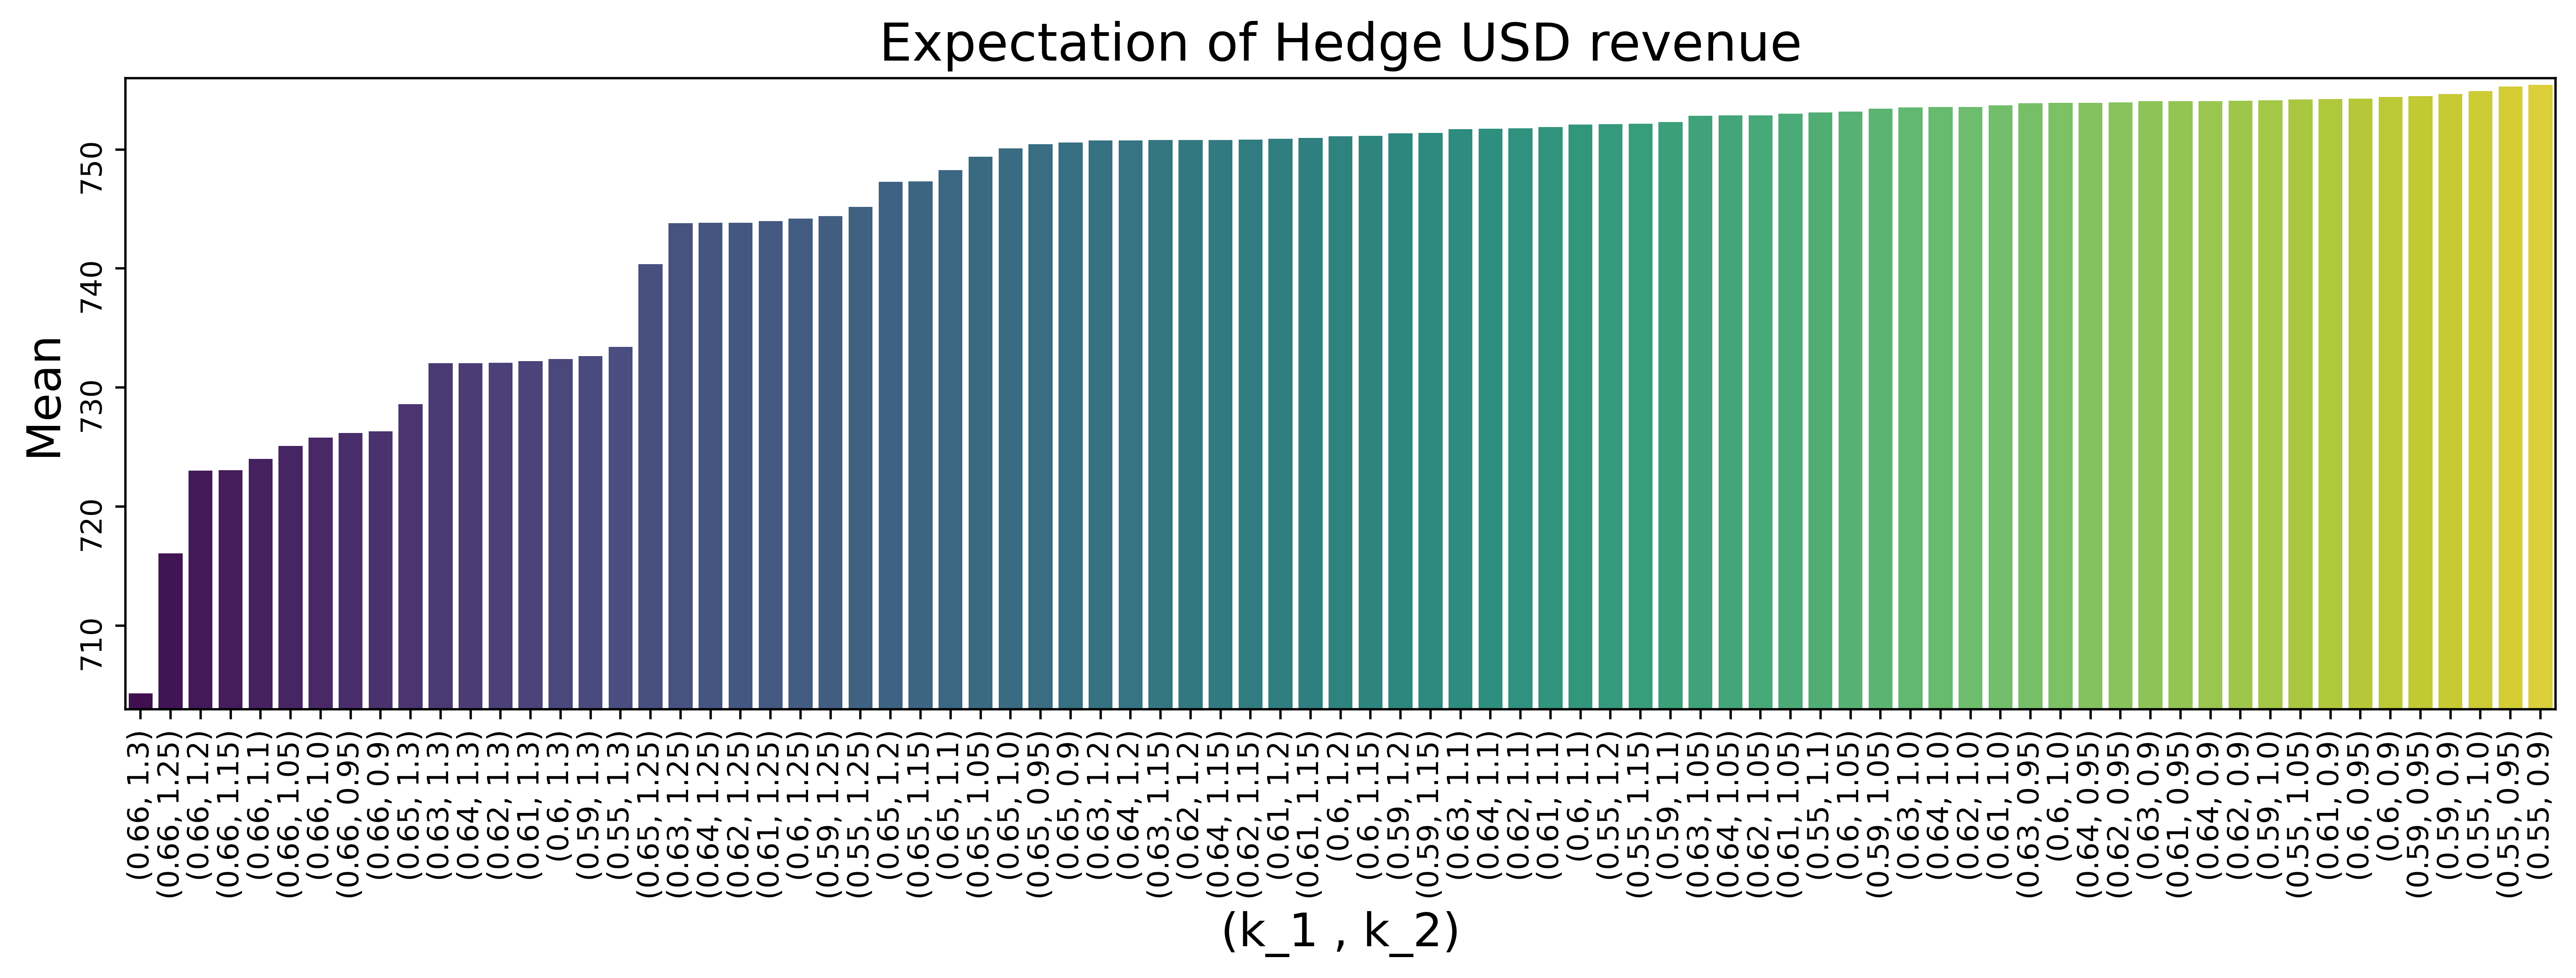

In [113]:
plt.figure(figsize=(15,4),dpi=500)
#ax=sns.barplot(data=Final_Hedg_mean,x='mean',color='lightseagreen') # Kernel Density Estimation
ax=sns.barplot(y='mean',x='(k_1,k_2)',data=Final_Hedg_mean,palette='viridis')

plt.title('Expectation of Hedge USD revenue', fontsize=18)
plt.xlabel('(k_1 , k_2)', fontsize=16)
plt.ylabel('Mean', fontsize=16)
plt.ylim(703,756) # Lower Limit, Upper Limit
plt.xticks(rotation=90);
plt.yticks(rotation=90);


ax.figure.savefig('Mean.png', dpi=500,bbox_inches='tight')

## Calculating the Probability of Hedged USD Revenue greater than 706 million USD for every German and Britain put option combinations (81 in total)

In [114]:
Final_Hedg_t=np.transpose(Final_Hedg)

Prob = []
for i in range(0,len(Final_Hedg.columns)):
    p=sum(Final_Hedg_t.iloc[i]>706)/len(Final_Hedg_t.iloc[i])
    Prob.append(p)

In [115]:
Final_Hedg.loc[len(Final_Hedg)]= Prob

In [125]:
Probabilities = pd.DataFrame(Final_Hedg.iloc[10000])
Probabilities = Probabilities.rename(columns={10000: 'Probabilities'})
Probabilities.index.names = ['(k_1,k_2)']
Probabilities['(k_1,k_2)'] =  Probabilities.index
Probabilities = Probabilities.sort_values('Probabilities',ascending=True)

,Probabilities,"(k_1,k_2)"
"(k_1,k_2)",,
"(0.66, 1.3)",0.4000,"(0.66, 1.3)"
"(0.66, 1.25)",0.5319,"(0.66, 1.25)"
"(0.66, 1.15)",0.5478,"(0.66, 1.15)"
"(0.66, 1.1)",0.5599,"(0.66, 1.1)"
"(0.66, 1.2)",0.5832,"(0.66, 1.2)"
...,...,...
"(0.65, 1.25)",0.8862,"(0.65, 1.25)"
"(0.64, 1.25)",0.9041,"(0.64, 1.25)"
"(0.63, 1.2)",0.9060,"(0.63, 1.2)"


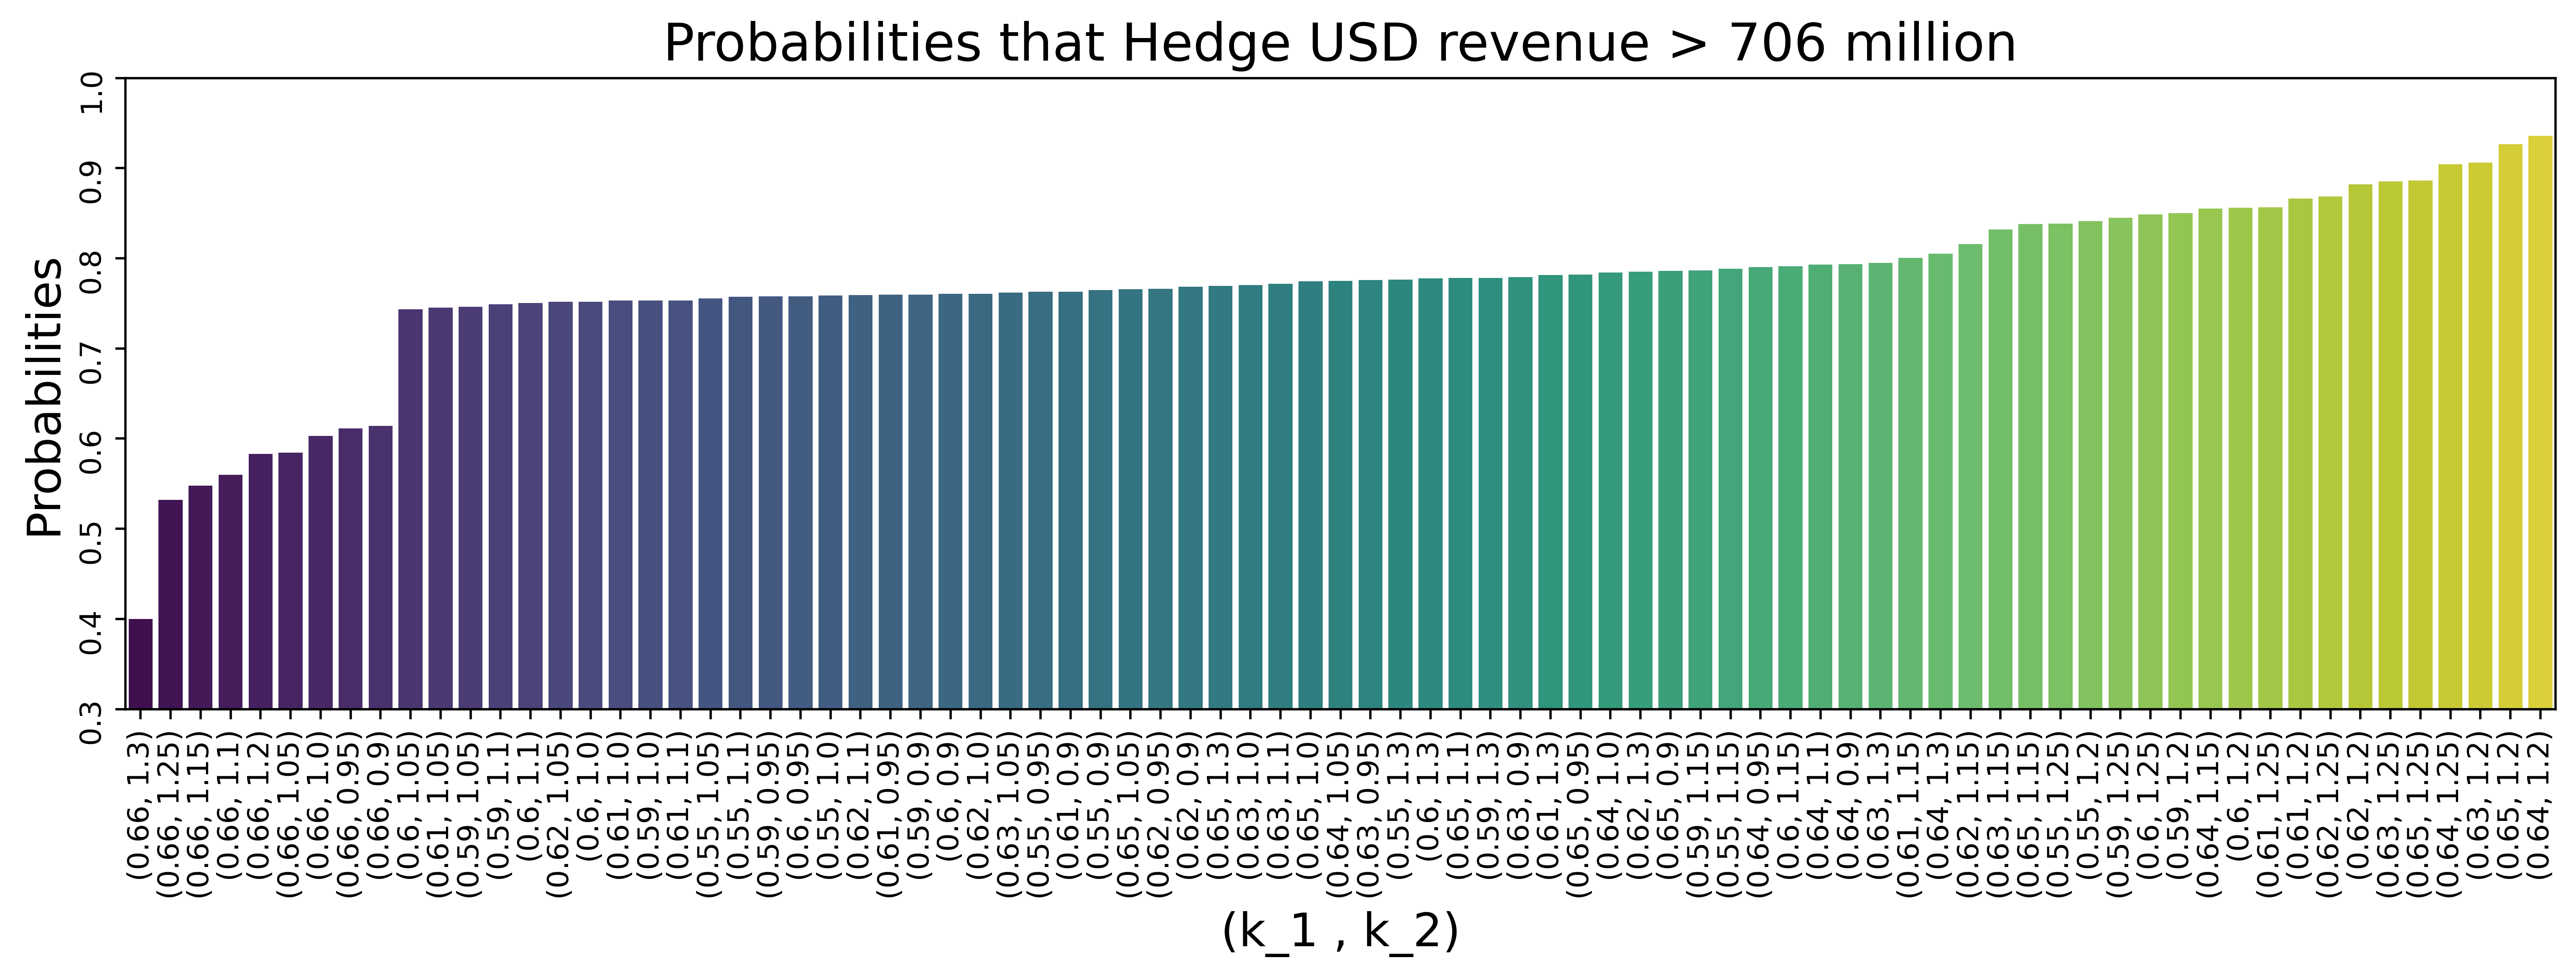

In [128]:
plt.figure(figsize=(15,4),dpi=500)
#ax=sns.barplot(data=Final_Hedg_mean,x='mean',color='lightseagreen') # Kernel Density Estimation
ax=sns.barplot(y='Probabilities',x='(k_1,k_2)',data=Probabilities,palette='viridis')

plt.title('Probabilities that Hedge USD revenue > 706 million', fontsize=18)
plt.xlabel('(k_1 , k_2)', fontsize=16)
plt.ylabel('Probabilities', fontsize=16)
plt.ylim(0.3,1) # Lower Limit, Upper Limit
plt.xticks(rotation=90);
plt.yticks(rotation=90);


ax.figure.savefig('Proba.png', dpi=500,bbox_inches='tight')

In [121]:
Probabilities
#Probabilities.to_csv('C:\\Users\\sabbe\\Desktop\\University of Pittsburgh\\Fall 2021\\IE 2086 Decision Models\\ps1\\Project\\Probabilities.csv')

,Probabilities,"(k_1,k_2)"
"(k_1,k_2)",,
"(0.66, 1.3)",0.4000,"(0.66, 1.3)"
"(0.66, 1.25)",0.5319,"(0.66, 1.25)"
"(0.66, 1.2)",0.5832,"(0.66, 1.2)"
"(0.66, 1.15)",0.5478,"(0.66, 1.15)"
"(0.66, 1.1)",0.5599,"(0.66, 1.1)"
...,...,...
"(0.55, 1.1)",0.7574,"(0.55, 1.1)"
"(0.55, 1.05)",0.7556,"(0.55, 1.05)"
"(0.55, 1.0)",0.7588,"(0.55, 1.0)"


In [152]:
Probabilities = pd.DataFrame(Final_Hedg.iloc[10000])
Probabilities = Probabilities.rename(columns={10000: 'Probabilities'})
Probabilities.index.names = ['(k_1,k_2)']
Probabilities['k_1'] = Probabilities['Probabilities']
Probabilities['k_2'] = Probabilities['Probabilities']

,Probabilities,k_1,k_2
"(k_1,k_2)",,,
"(0.66, 1.3)",0.4000,0.4000,0.4000
"(0.66, 1.25)",0.5319,0.5319,0.5319
"(0.66, 1.2)",0.5832,0.5832,0.5832
"(0.66, 1.15)",0.5478,0.5478,0.5478
"(0.66, 1.1)",0.5599,0.5599,0.5599
...,...,...,...
"(0.55, 1.1)",0.7574,0.7574,0.7574
"(0.55, 1.05)",0.7556,0.7556,0.7556
"(0.55, 1.0)",0.7588,0.7588,0.7588


In [155]:
i=0
for a in range(0,len(k_1)):
    for b in range(0,len(k_2)):
        Probabilities['k_1'].iloc[i] = k_1[a]
        Probabilities['k_2'].iloc[i] = k_2[b]
        i=i+1

In [169]:
Probabilities['k_1']

(k_1,k_2)
(0.66, 1.3)     0.66
(0.66, 1.25)    0.66
(0.66, 1.2)     0.66
(0.66, 1.15)    0.66
(0.66, 1.1)     0.66
                ... 
(0.55, 1.1)     0.55
(0.55, 1.05)    0.55
(0.55, 1.0)     0.55
(0.55, 0.95)    0.55
(0.55, 0.9)     0.55
Name: k_1, Length: 81, dtype: float64

In [171]:
xpos = Probabilities['k_1']
ypos = Probabilities['k_2']
xpos, ypos = np.meshgrid(xpos, ypos)
xpos = xpos.flatten()
ypos = ypos.flatten()

zpos=Probabilities['Probabilities']

dx=0.5 * np.ones_like(zpos)
dy=0.5 * np.ones_like(zpos)
dz=df.values.ravel()

ax.bar3d(xpos,ypos,zpos,dx,dy,dz,color='b', alpha=0.5)
plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape

## Strikes (k_1,k_2) with the probability that Hedged USD Revenue will be greater than 706 million USD

In [85]:
Probabilities['Probabilities'].idxmax()

'(0.64, 1.2)'

## Value of the probability

In [86]:
Probabilities.loc['(0.64, 1.25)']

Probabilities    0.9041
Name: (0.64, 1.25), dtype: float64

## Calculating for different combinations of number of put options

In [20]:
PG = 500 ## put options on DM in million
PB = 300 ## put options on Pound in million

#Hedg_G = []
#Hedg_B = []
Hedg = []
Final_Hedg_1 = []

for a in range(0,len(k_1)):
    for b in range(0,len(k_2)):
        for i in range(0,len(df)):
    
            Hedg_g = EG*df['D'].iloc[i] + PG*(max(k_1[a]-df['D'].iloc[i],0)-c_1[a])
            #Hedge_G.append(Hedg_g)
    
            Hedg_b = EB*df['B'].iloc[i] + PB*(max(k_2[b]-df['B'].iloc[i],0)-c_2[b])
            #Hedge_B.append(Hedg_b)
            
            Hedg_ = Hedg_g + Hedg_b
            Hedg.append(Hedg_)
            
        Final_Hedg_1.append(Hedg)
        Hedg=[]
    
Final_Hedg_1=np.array(Final_Hedg_1)
Final_Hedg_1=np.transpose(Final_Hedg_1)
Final_Hedg_1=pd.DataFrame(Final_Hedg_1)

i=0
for a in range(0,len(k_1)):
    for b in range(0,len(k_2)):
        Final_Hedg_1 = Final_Hedg_1.rename(columns={i: f'{k_1[a],k_2[b]}'})
        i=i+1
        
Final_Hedg_t_1=np.transpose(Final_Hedg_1)

Prob_1 = []
for i in range(0,len(Final_Hedg_1.columns)):
    p=sum(Final_Hedg_t_1.iloc[i]>706)/len(Final_Hedg_t_1.iloc[i])
    Prob_1.append(p)
    
Final_Hedg_1.loc[len(Final_Hedg_1)]= Prob_1
Probabilities_1 = pd.DataFrame(Final_Hedg_1.iloc[10000])
Probabilities_1 = Probabilities_1.rename(columns={10000: 'Probabilities'})
Probabilities_1.index.names = ['(k_1,k_2)']


In [21]:
#L=[]
L.append(Probabilities_1.loc[Probabilities_1['Probabilities'].idxmax()])

In [29]:
L

[Probabilities    0.783
 Name: (0.64, 1.25), dtype: float64,
 Probabilities    0.8287
 Name: (0.64, 1.25), dtype: float64,
 Probabilities    0.7974
 Name: (0.64, 1.25), dtype: float64,
 Probabilities    0.8741
 Name: (0.64, 1.25), dtype: float64,
 Probabilities    0.898
 Name: (0.64, 1.2), dtype: float64,
 Probabilities    0.9804
 Name: (0.64, 1.25), dtype: float64]

## Maximum probability values of the combinations in the same order as shown in the question

In [59]:
Comb = pd.DataFrame(L)
Comb

,Probabilities
"(0.64, 1.25)",0.7830
"(0.64, 1.25)",0.8287
"(0.64, 1.25)",0.7974
"(0.64, 1.25)",0.8741
"(0.64, 1.2)",0.8980
"(0.64, 1.25)",0.9804


In [71]:
#Comb.to_csv('C:\\Users\\sabbe\\Desktop\\University of Pittsburgh\\Fall 2021\\IE 2086 Decision Models\\ps1\\Comb.csv')